# Análise dos Dados do Airbnb - Rio de Janeiro
Desde 2008, viajantes e anfitriões usam o Airbnb para obter preços mais acessiveis em estadias ao longo do mundo e também para ganhar um dinheiro extra com aquele quarto parado na sua casa ou aquela casa de vereneio.

Nesse notebook, vou detalhar as listas de aitividades e métricas para a cidade de Rio de Janeiro, Brasil. Com isso, vamos conseguir gerar insights que podem ser usados pela companhia de Marketing para aumento potencial de clientes, investidores e interesse geral.

# Fonte dos Dados
A fonte veio por meio do portal Inside Airbnb.

[Inside Airbnb](http://insideairbnb.com/get-the-data)

Iremos utilizar o arquivo listings.csv da cidade escolhida, no nosso caso, Rio de Janeiro.

Os dados estão atualizados em 2023 com o código versátil que funciona para analisar os anos anteriores.

# Obtendo os Dados

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#apenas para facilitar a plotagem dos gráficos
%matplotlib inline 

In [14]:
# importar o arquivo do site para um DataFrame
#utilize sempre o arquivo que contém Summary information
link_abnb = 'http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-03-28/visualisations/listings.csv'
df = pd.read_csv(link_abnb)

In [15]:
#vamos ver o DataFrame (DF) como está organizado.
#o comando .head() mostra o cabeçalho do arquivo, pode-se especificar o número de linhas inserindo dentro dos parenteses. 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,288,2023-03-01,1.86,1,264,19,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,624,3,86,2023-03-27,0.56,3,357,1,NaN
2,200568,30m of Ipa Beach e fins de semana special price !,980805,Henrique,NaN,Ipanema,-22.98586,-43.19411,Entire home/apt,100,30,198,2023-02-13,1.45,6,59,9,NaN
3,342874,Comfortable in Copacabana beach,829630,Luciana,NaN,Leme,-22.96392,-43.17263,Entire home/apt,236,2,159,2023-02-26,1.19,3,105,31,NaN
4,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,307,3,262,2023-03-27,1.68,1,257,14,NaN


#Análise dos Dados
**Dicionário das variáveis**



*   id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias


Agora sabemos o que cada coluna nos indica. Essas informações normalmente estão expostas na própria fonte de dados.





### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguindo na análise geral do DF, vamos verificar a quantidade de dados e o tipo de cada coluna.
Lembrando que essa é uma versão resumida do AirBnb (summary information), há outras bases mais completas!

In [27]:
# identificar o volume de dados do DataFrame
#0 para linhas e 1 para colunas
print("Entradas ou linhas: \t {}".format(df.shape[0]))
print("Variáveis ou colunas: \t {}".format(df.shape[1]))

# verificar o tipo dos dados no dataset
display(df.dtypes)


Entradas ou linhas: 	 30476
Variáveis ou colunas: 	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Um dos primeiros passos na analise de dados é verificar a qualidade dos mesmos.
Nesse ponto iremos tratar os dados ausentes e entender se os dados nulos serão importantes na nossa análise.


In [26]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.246227
last_review                       0.246227
name                              0.000591
host_name                         0.000098
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64


*   É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
*   As variáveis reviews_per_month e last_review possuem valores nulos em quase metade das linhas.
*   As variáveis name e host_name têm aproximadamente 0,1% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para melhor visualizar os dados e identificar a distribuição das variáveis, o gráfico de barras (histograma) é uma boa opção.

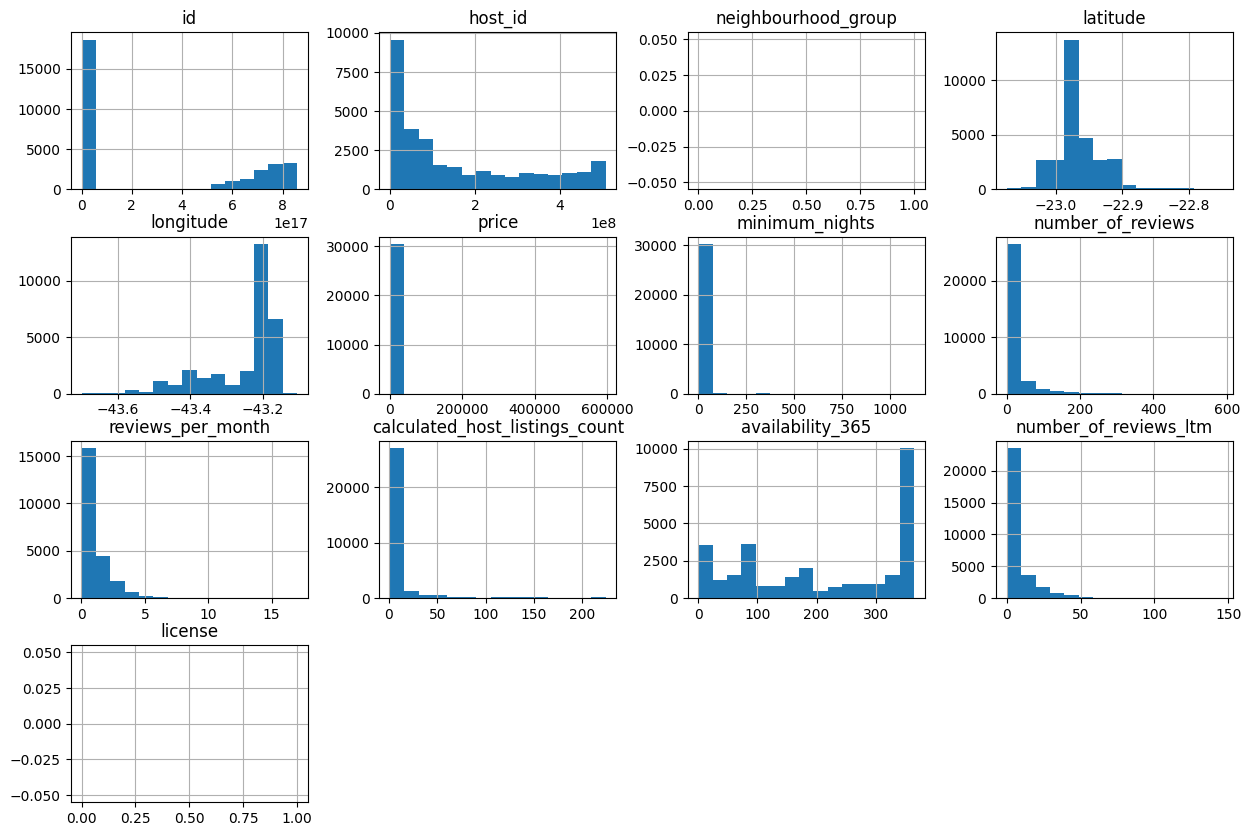

In [25]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10));

*   A maior parte da amostra não possui disponibilidade ou está disponível durante o ano;
*   A maior parte da amostra está possui apenas um host (barra do host_id 1 é a maior);
*   A maior parte da amostra não possui reviews ou apenas uma

---



####Tratando os pontos fora da curva (outliers)
Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica.

In [24]:
#ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,30476.000000,30476.000000,30476.000000,22972.000000,30476.000000,30476.000000
mean,981.616912,4.854312,18.260172,1.014667,9.816118,210.453865
std,8625.188625,24.354187,38.502717,1.082735,28.249902,136.075327
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,1.000000,0.230000,1.000000,85.000000
50%,350.000000,2.000000,4.000000,0.700000,2.000000,212.000000
75%,650.000000,4.000000,17.000000,1.440000,4.000000,359.000000
max,595793.000000,1125.000000,588.000000,17.010000,224.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:


*   A variável price possui 75% do valor abaixo de 632, porém seu valor máximo é 131727.
*   A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.



####Boxplot Minimum_nights
Vamos fazer um zoom na variável noites mínimas (minimum_nights) para explorar a hipótese acima:

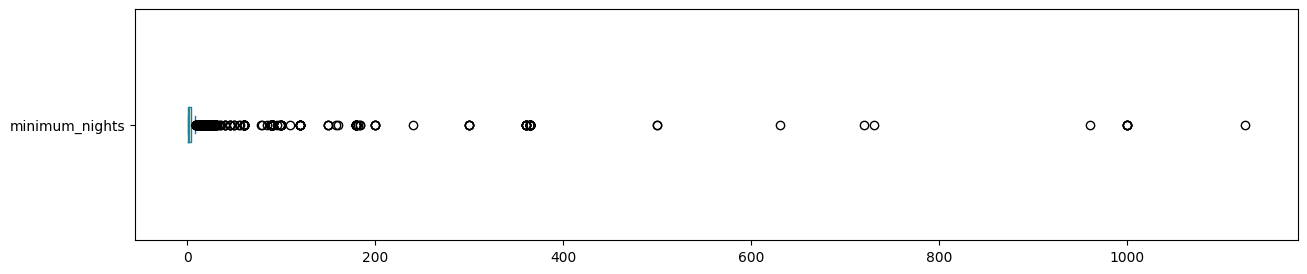

minimum_nights: valores acima de 30:
257 entradas
0.8433%


In [23]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Não faz sentido anúncios no AirBnb com mínimo de noites acima de 30 dias. Eu entendo que a plataforma não é para isso.

####Boxplot Price
Agora vamos aplicar o zoom para a variável price:

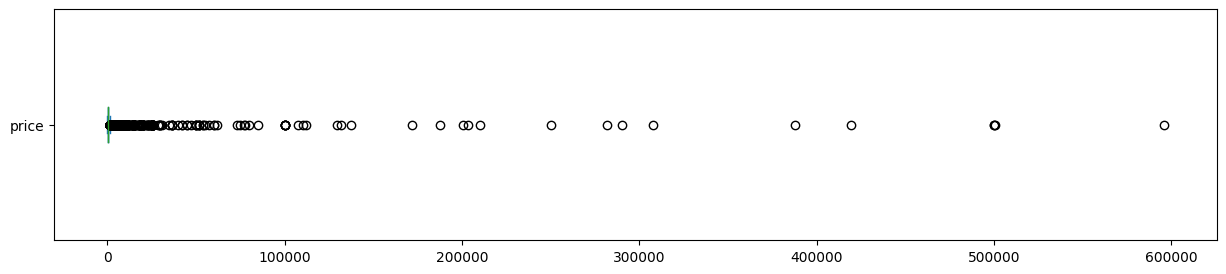


price: valores acima de 1500
2417 entradas
7.9308%


In [22]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Imóveis com valores de locação acima de R$1.500 a noite distorcem a avaliação final, pois provavelmente são outras categorias de imóveis ou até mesmo erros no cadastramento do anúncio.

####Limpando os dados e novos histogramas
Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame original e plotar novamente o histograma.

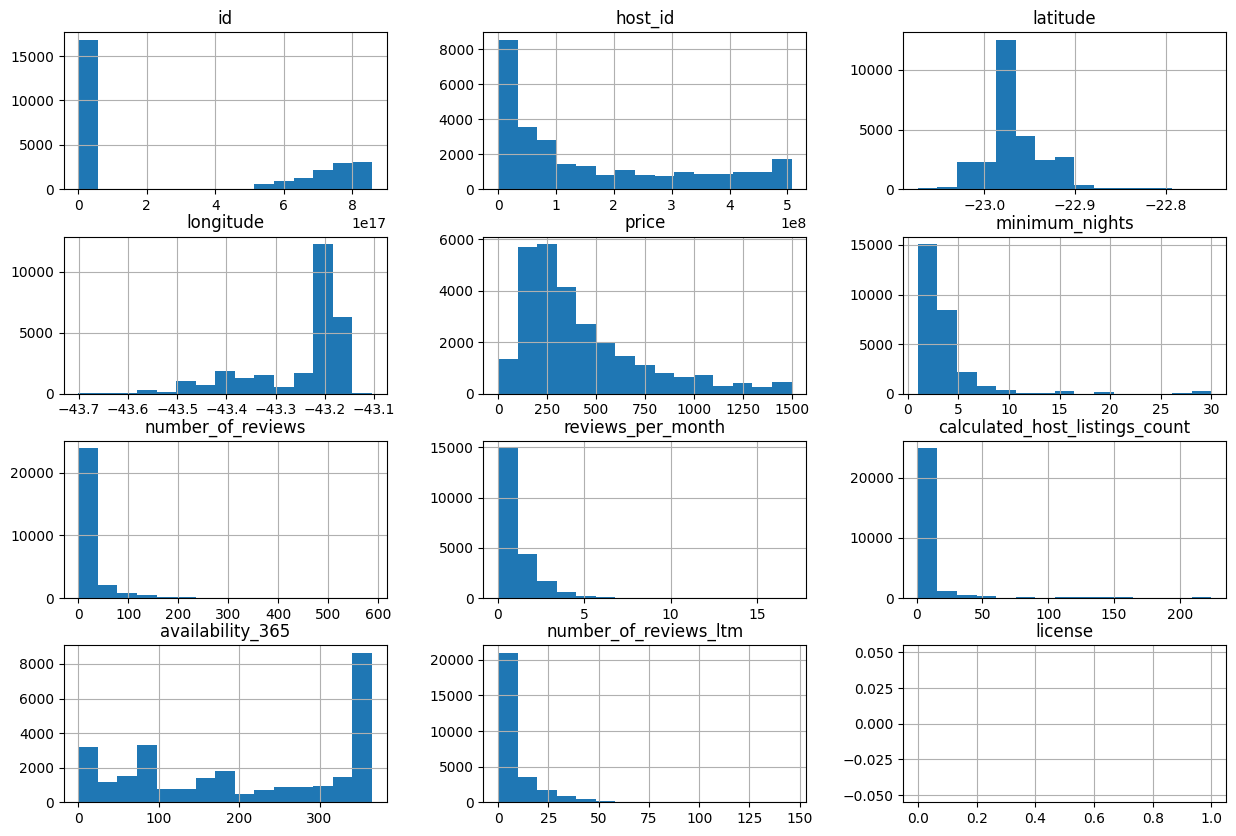

In [21]:
#remover os *outliers* e aplciar a um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover a coluna 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar novo histograma
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

ambas são funções da biblioteca seaborn e com uma linha de código é possível gerar a informação.



In [20]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014235,-0.192051,-0.126101,-0.039326,0.198614
minimum_nights,-0.014235,1.000000,-0.124577,-0.139169,-0.086270,-0.046031
number_of_reviews,-0.192051,-0.124577,1.000000,0.719413,0.036937,0.168870
reviews_per_month,-0.126101,-0.139169,0.719413,1.000000,0.114955,0.228759
calculated_host_listings_count,-0.039326,-0.086270,0.036937,0.114955,1.000000,0.336593
availability_365,0.198614,-0.046031,0.168870,0.228759,0.336593,1.000000


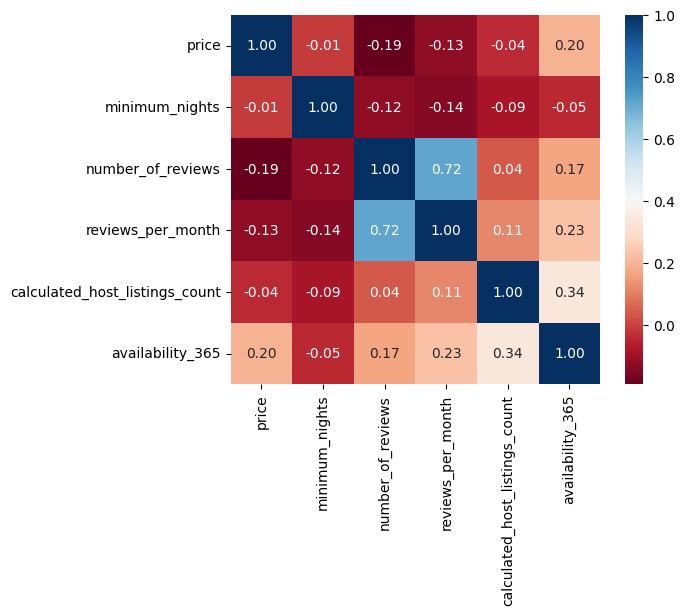

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Apenas para recapitular:

**O que é análise de correlação?** É uma análise descritiva que mede se há e qual o grau de dependência entre duas variáveis (preço e reviews), como no exemplo simplificado à seguir: Se o preço e número de reviews aumentam e diminuem quase sempre juntos: há correlação positiva


*   quanto mais próximo de 1, maior a correlação entre as variáveis
*   quanto mais próximo de -1, menor a correlação entre as vairáveis



### **Q5. Qual o Preço Médio?**



In [17]:
# ver a média da coluna `price`
price_mean = df_clean['price'].mean()

print("O preço médio para locação é: R$ {:.2f}".format(price_mean))

O preço médio para locação é: R$ 219.90


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts()

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5120
Private room       1735
Hotel room           62
Shared room          39
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.766835
Private room       0.214021
Shared room        0.017527
Hotel room         0.001616
Name: room_type, dtype: float64

Dessas duas informações podemos verificar que o imóvel mais alugado é o imóvel inteiro, seguido pelo aluguel de um quarto.

Podemos ainda extrair a informação que praticamente 70% dos imóveis são relativos o imóvel mais alugado.

### **Q7. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [29]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju                  941.500000
Complexo do Alemão    900.000000
São Conrado           680.497268
Joá                   645.959184
Leblon                590.021953
Lagoa                 572.531401
Santíssimo            546.750000
Galeão                543.500000
Ipanema               539.762414
Grumari               530.571429
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

Esse é um erro devido a falta de normalização da base de dados. Tais erros podem levar a distorções durante a análise, conforme visto nesse exemplo.

In [30]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(4, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6285,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.855270,-43.326230,Entire home/apt,1310,15,0,NaN,NaN,1,365,0,NaN
21593,680404426865999077,Family home,471878990,Renata,Vaz Lobo,-22.860660,-43.329540,Entire home/apt,260,1,10,2023-02-20,1.47,2,86,10,NaN
23349,719116581332256488,Espaço Meu momento,471878990,Renata,Vaz Lobo,-22.861080,-43.329340,Private room,95,1,0,NaN,NaN,2,84,0,NaN
29948,840540930301527398,ótimo apartamento condução ótimo,503987483,Alessandra Sousa,Vaz Lobo,-22.855939,-43.330371,Private room,66,1,0,NaN,NaN,1,364,0,NaN


Poucas amostras causam distorções na análise!


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

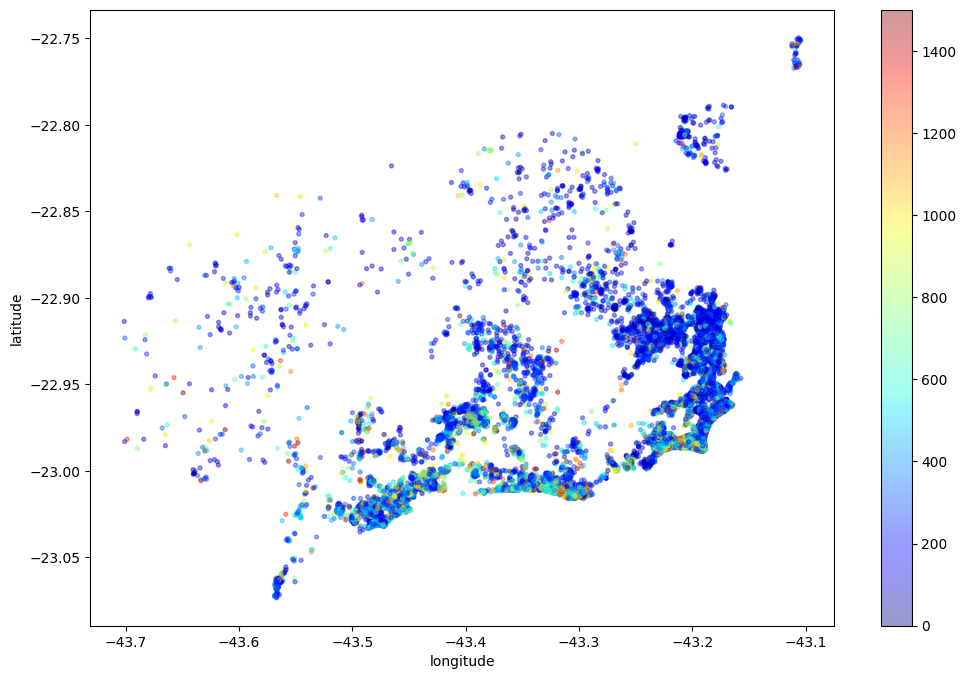

In [31]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel?**

Iremos verificar através da coluna de variáveis nimum_nights.

In [32]:
# ver a média da coluna `minimum_nights`
nights_mean = round(df_clean['minimum_nights'].mean(),0)

print("A média para locação é de {:.0f} noites por imóvel." .format(nights_mean))

A média para locação é de 3 noites por imóvel.


### **Q9. Bonus - Atavrés de um formulário crie novas pesquisas**

In [33]:
#extrair lista para facilitar a filtragem
bairros = df_clean['neighbourhood'].drop_duplicates().sort_values(ascending=True).tolist()
noites = df_clean['minimum_nights'].drop_duplicates().sort_values(ascending=True).tolist()
reviews = df_clean['number_of_reviews'].drop_duplicates().sort_values(ascending=True).tolist()

Pesquisa de anúncios

In [36]:
#@title Pesquisa de anúncios {run: "auto"}

escolha_o_bairro = 'Botafogo' #@param ['Abolição', 'Alto da Boa Vista', 'Anchieta', 'Andaraí', 'Anil', 'Bancários', 'Bangu', 'Barra da Tijuca', 'Barra de Guaratiba', 'Barros Filho', 'Benfica', 'Bento Ribeiro', 'Bonsucesso', 'Botafogo', 'Brás de Pina', 'Cachambi', 'Cacuia', 'Caju', 'Camorim', 'Campinho', 'Campo Grande', 'Campo dos Afonsos', 'Cascadura', 'Catete', 'Catumbi', 'Cavalcanti', 'Centro', 'Cidade Nova', 'Cidade Universitária', 'Cidade de Deus', 'Cocotá', 'Coelho Neto', 'Colégio', 'Complexo do Alemão', 'Copacabana', 'Cordovil', 'Cosme Velho', 'Cosmos', 'Curicica', 'Del Castilho', 'Deodoro', 'Encantado', 'Engenheiro Leal', 'Engenho Novo', 'Engenho da Rainha', 'Engenho de Dentro', 'Estácio', 'Flamengo', 'Freguesia (Ilha)', 'Freguesia (Jacarepaguá)', 'Galeão', 'Gamboa', 'Gardênia Azul', 'Gericinó', 'Glória', 'Grajaú', 'Grumari', 'Guadalupe', 'Guaratiba', 'Gávea', 'Higienópolis', 'Honório Gurgel', 'Humaitá', 'Inhaúma', 'Inhoaíba', 'Ipanema', 'Irajá', 'Itanhangá', 'Jacarepaguá', 'Jacaré', 'Jardim América', 'Jardim Botânico', 'Jardim Carioca', 'Jardim Guanabara', 'Jardim Sulacap', 'Joá', 'Lagoa', 'Laranjeiras', 'Leblon', 'Leme', 'Lins de Vasconcelos', 'Madureira', 'Magalhães Bastos', 'Mangueira', 'Manguinhos', 'Maracanã', 'Marechal Hermes', 'Maria da Graça', 'Maré', 'Moneró', 'Méier', 'Olaria', 'Osvaldo Cruz', 'Paciência', 'Padre Miguel', 'Paquetá', 'Parada de Lucas', 'Parque Anchieta', 'Parque Colúmbia', 'Pavuna', 'Pechincha', 'Pedra de Guaratiba', 'Penha', 'Penha Circular', 'Piedade', 'Pilares', 'Pitangueiras', 'Portuguesa', 'Praia da Bandeira', 'Praça Seca', 'Praça da Bandeira', 'Quintino Bocaiúva', 'Ramos', 'Realengo', 'Recreio dos Bandeirantes', 'Riachuelo', 'Ribeira', 'Ricardo de Albuquerque', 'Rio Comprido', 'Rocha', 'Rocha Miranda', 'Rocinha', 'Sampaio', 'Santa Cruz', 'Santa Teresa', 'Santo Cristo', 'Santíssimo', 'Saúde', 'Senador Camará', 'Senador Vasconcelos', 'Sepetiba', 'São Conrado', 'São Cristóvão', 'São Francisco Xavier', 'Tanque', 'Taquara', 'Tauá', 'Tijuca', 'Todos os Santos', 'Tomás Coelho', 'Urca', 'Vargem Grande', 'Vargem Pequena', 'Vasco da Gama', 'Vaz Lobo', 'Vicente de Carvalho', 'Vidigal', 'Vigário Geral', 'Vila Isabel', 'Vila Kosmos', 'Vila Militar', 'Vila Valqueire', 'Vila da Penha', 'Vista Alegre', 'Água Santa']
numero_noites = 9 #@param {type:"slider", min:0, max:30, step:1}
quantidade_reviews = 4 #@param {type:"slider", min:1, max:400, step:1}

# imprimir os valores dos formulários
print("Os 5 primeiros anúncios com base nos parâmetros escolhidos são:")
df_search = df_clean[df_clean.neighbourhood == escolha_o_bairro]
df_search = df_search[df_search.minimum_nights >= numero_noites]
df_search = df_search[df_search.number_of_reviews == quantidade_reviews]
df_search.sort_values(by=['price'], ascending=False)[:5]

Os 5 primeiros anúncios com base nos parâmetros escolhidos são:


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
11349,37771860,Best view in Rio! Party area!,284500440,Marie,Botafogo,-22.95106,-43.18201,Entire home/apt,298,28,4,2022-01-28,0.19,1,365,0,NaN
16474,52499254,Apartamento completo em Botafogo Rio de Janeir...,424937860,Marcus Victor,Botafogo,-22.94417,-43.18376,Entire home/apt,160,15,4,2023-03-02,0.27,1,35,3,NaN


## Conclusões

* Aqui foi feita uma análise superficial sobre os dados 


* disponíveis no arquivo citado anteriormente. Para uma análise mais completa recomendo que seja utilizado o dataset que contém mais variáveis/atributos.

* Conseguimos identificar valores ausentes e outliers, fazer seu tratamento, plotamos alguns gráficos para análise e no final conseguimos responder algumas perguntas.

